<a href="https://colab.research.google.com/github/ghulam2545/deep_learning/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator

print('GPU is available' if tf.config.list_physical_devices('GPU') else 'GPU is not available')

GPU is available


In [2]:
train_dir = '/content/drive/MyDrive/dataset/chest_xray/train'
val_dir = '/content/drive/MyDrive/dataset/chest_xray/val'
test_dir = '/content/drive/MyDrive/dataset/chest_xray/test'

In [3]:
data_generator = ImageDataGenerator(
    rescale = 1. / 255 
)

In [4]:
train_ds = data_generator.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=64,
    shuffle=True,
    class_mode='binary'
)

Found 5163 images belonging to 2 classes.


In [5]:
val_ds = data_generator.flow_from_directory(
    val_dir,
    target_size=(200, 200),
    batch_size=64,
    shuffle=True,
    class_mode='binary'
)

Found 16 images belonging to 2 classes.


In [6]:
test_ds = data_generator.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=64,
    shuffle=True,
    class_mode='binary'
)

Found 613 images belonging to 2 classes.


In [7]:
x_train, y_train = train_ds.next()

print(x_train.shape)
print(y_train.shape)

(64, 200, 200, 3)
(64,)


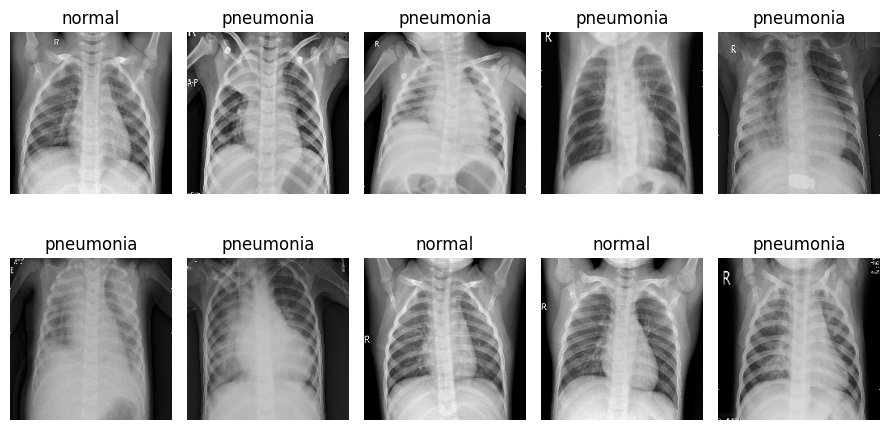

In [8]:
# lookup at some train images

plt.figure(figsize=(9, 5))
for i in range(2*5):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_train[i])
  plt.title('normal' if int(y_train[i]) == 0 else 'pneumonia')
  plt.axis('off')
plt.tight_layout()
plt.show()  

In [9]:
model = keras.Sequential([
    layers.Input(shape=(200, 200, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 64)                2

In [11]:
my_opt = keras.optimizers.Adam(learning_rate=0.001)
my_loss = 'binary_crossentropy'

model.compile(optimizer=my_opt, loss=my_loss, metrics=['accuracy'])

In [12]:
model.fit(train_ds, batch_size=64, epochs=3)

Epoch 1/3
81/81 [==============================] - 81s 944ms/step - loss: 0.3439 - accuracy: 0.8452
Epoch 2/3
81/81 [==============================] - 73s 906ms/step - loss: 0.1205 - accuracy: 0.9564
Epoch 3/3
81/81 [==============================] - 74s 912ms/step - loss: 0.0926 - accuracy: 0.9663


In [13]:
model.evaluate(test_ds)

10/10 [==============================] - 8s 792ms/step - loss: 0.7437 - accuracy: 0.7781


[0.7437063455581665, 0.7781403064727783]

In [37]:
sample = test_ds.next()

In [38]:
x_test, y_test = sample

print(x_test.shape)
print(y_test.shape)

(64, 200, 200, 3)
(64,)


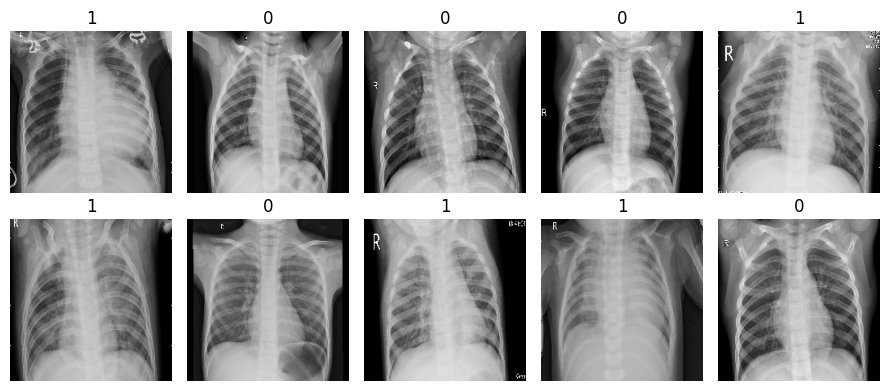

In [39]:
# lookup at some test images

plt.figure(figsize=(9, 4))
for i in range(2*5):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_test[i])
  plt.title(int(y_test[i]))
  plt.axis('off')
plt.tight_layout()
plt.show()  

In [40]:
pred = model.predict(x_test)

for i in pred[:40]:
  print(int(i), end=', ')

2/2 [==============================] - 0s 14ms/step
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [41]:
# again underfitting/overfitting